# 2. Working with multiple stocks

In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt

In [2]:
%matplotlib inline

## Joining data frames
You need to download `AAPL.csv` from [here](https://finance.yahoo.com/quote/AAPL/history?period1=1551444170&period2=1583066570&interval=1d&filter=history&frequency=1d)

In [3]:
start_date = '2020-02-01'
end_date = '2020-02-29'
dates = pd.date_range(start_date, end_date)

In [4]:
df1 = pd.DataFrame(index=dates)

In [5]:
dfSPY = pd.read_csv('data/SPY.csv', index_col='Date',
                    parse_dates=True, usecols=['Date', 'Adj Close'],
                    na_values=['nan'])

In [6]:
# inner: only rows common to both data frames
df1 = df1.join(dfSPY, how='inner')

In [7]:
df1.head() # weekend is nan

,Adj Close
2020-02-03,324.119995
2020-02-04,329.059998
2020-02-05,332.859985
2020-02-06,333.980011
2020-02-07,332.200012


## More stocks

In [8]:
df1 = pd.DataFrame(index=dates)

In [9]:
symbols = ['GOOG', 'IBM', 'GLD']

for symbol in symbols:
    df = pd.read_csv(f'data/{symbol}.csv', index_col='Date',
                     parse_dates=True, usecols=['Date', 'Adj Close'],
                     na_values=['nan'])
    df = df.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df)

In [10]:
df1.head()

,GOOG,IBM,GLD
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,1485.939941,144.758408,148.360001
2020-02-04,1447.069946,147.569061,146.429993
2020-02-05,1448.229980,154.714447,146.610001


## Utility functions

In [11]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [12]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)

    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_symbol = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                     parse_dates=True, usecols=['Date', 'Adj Close'],
                     na_values=['nan'])
        df_symbol = df_symbol.rename(columns={'Adj Close': symbol})
        df = df.join(df_symbol, how='inner')

    return df

In [13]:
df = get_data(symbols, dates)
df.head()

,SPY,GOOG,IBM,GLD
2020-02-03,324.119995,1485.939941,144.758408,148.360001
2020-02-04,329.059998,1447.069946,147.569061,146.429993
2020-02-05,332.859985,1448.229980,154.714447,146.610001
2020-02-06,333.980011,1476.229980,155.139999,147.399994
2020-02-07,332.200012,1479.229980,153.410004,147.789993


## Slicing

### Row

Course says `ix`, but that's deprecated.

In [14]:
df.loc['2020-02-03':'2020-02-05']

,SPY,GOOG,IBM,GLD
2020-02-03,324.119995,1485.939941,144.758408,148.360001
2020-02-04,329.059998,1447.069946,147.569061,146.429993
2020-02-05,332.859985,1448.229980,154.714447,146.610001


### Column

In [15]:
df['SPY'].head()

2020-02-03    324.119995
2020-02-04    329.059998
2020-02-05    332.859985
2020-02-06    333.980011
2020-02-07    332.200012
Name: SPY, dtype: float64

In [16]:
df[['SPY', 'GOOG']].head()

,SPY,GOOG
2020-02-03,324.119995,1485.939941
2020-02-04,329.059998,1447.069946
2020-02-05,332.859985,1448.229980
2020-02-06,333.980011,1476.229980
2020-02-07,332.200012,1479.229980


### Row and column

In [17]:
df.loc['2020-02-03':'2020-02-05', ['SPY', 'GOOG']].head()

,SPY,GOOG
2020-02-03,324.119995,1485.939941
2020-02-04,329.059998,1447.069946
2020-02-05,332.859985,1448.229980


## Plotting

Different scales...

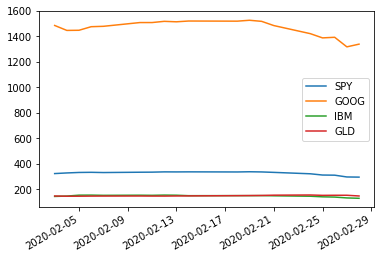

In [18]:
df.plot()

Start at `1.000`

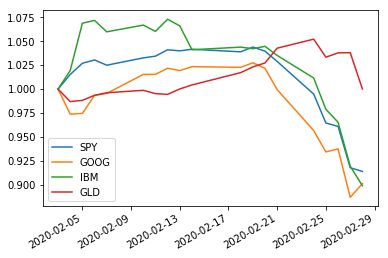

In [19]:
(df / df.iloc[0]).plot()